<a href="https://colab.research.google.com/github/Victor-KKKK/AI_study/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

def forward(x):
    y = w * x + b
    return y

x = torch.tensor([4,7])
forward(x)



tensor([13., 22.], grad_fn=<AddBackward0>)

In [ ]:
from torch.nn import Linear

torch.manual_seed(1)
model = Linear(in_features=1, out_features=1)
print(model.bias, model.weight)

x = torch.tensor([[2.0], [3.3]]) # 여기서 []를 없애면 에러가 나네
print(x)
print(model(x))

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)
tensor([[2.0000],
        [3.3000]])
tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward0>)


tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward0>)


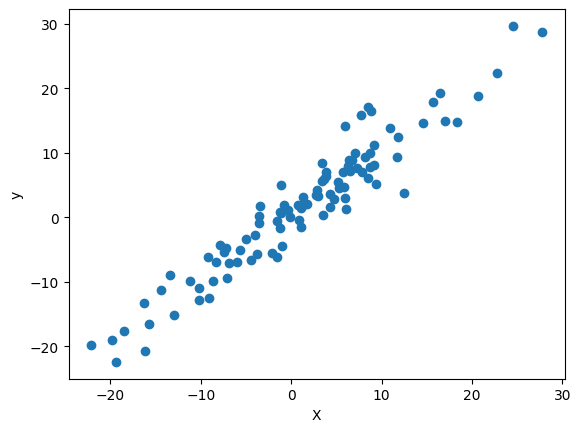

In [ ]:

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

X = torch.randn(100, 1) * 10
y = X + 3*torch.randn(100,1)

plt.plot(X.numpy(), y.numpy(), 'o')
plt.xlabel('X')
plt.ylabel('y')


class LR(nn.Module):
  def __init__(self, inputsize, outputsize):
    super().__init__() # super()에 괄호 있어야 함.
    self.linear = nn.Linear(inputsize, outputsize)
  def forward(self, x):
    pred = self.linear(x)
    return pred

torch.manual_seed(1)
model = LR(1,1)
x = torch.tensor([[1.0], [2.0]])
print(model.forward(x))

In [ ]:

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np


0.5152631998062134
-0.44137823581695557
[-30  30]


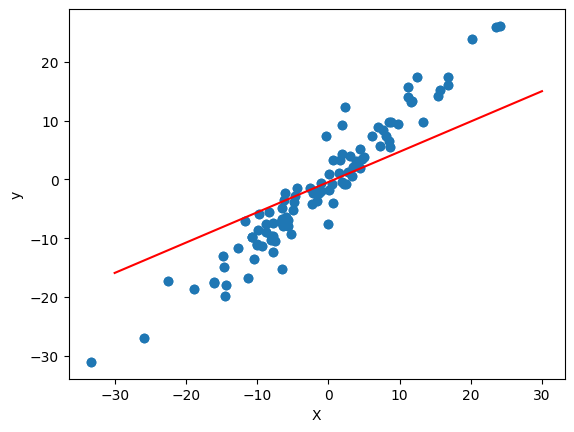

In [26]:


X = torch.randn(100, 1) * 10
y = X + 3*torch.randn(100,1)

plt.plot(X.numpy(), y.numpy(), 'o')
plt.xlabel('X')
plt.ylabel('y')


class LR(nn.Module):
  def __init__(self, inputsize, outputsize):
    super().__init__() # super()에 괄호 있어야 함.
    self.linear = nn.Linear(inputsize, outputsize)
  def forward(self, x):
    pred = self.linear(x)
    return pred

torch.manual_seed(1)
model = LR(1,1)

[w,b] = model.parameters()

def get_params():
  return ( w[0][0].item(), b[0].item() )

def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  print(w1)
  print(b1)
  x1 = np.array([-30,30])
  print(x1)
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

plot_fit('Initial Model')